## count how many data did i lost over cleaning and filtering

# **ALERTA**

# **ALERTA**

# **DIZER NA CONCLUSAO OU ASSIM Q É MAIS REALISTA TER TP 1 NOTICIA POR SEMANA**

# **ALERTA**

# **ALERTA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df01 = pd.read_parquet("data01.parquet").map(len)
df02 = pd.read_parquet("data02.parquet").map(len)
df03 = pd.read_parquet("data03.parquet").map(len)
df04 = pd.read_parquet("data04.parquet").map(len)

In [3]:
new_df = {}

for df, name in [(df01, "data01"), (df02, "data02"), (df03, "data03"), (df04, "data04")]:
    new_df[name] = df.iloc[:, 1:].sum(axis=1)

df = pd.DataFrame(new_df)
df

,data01,data02,data03,data04
companies,,,,
Banco Comercial Português,4596,3973,1284,807
Galp Energia,4886,3829,1338,809
EDP,5596,4479,1456,954
Sonae,5524,4681,899,520
Mota-Engil,2268,1685,459,296


In [4]:
df["data01\n(requested)"] = df["data01"] / df["data01"] * 100
df["data02\n(100% duplicates)"] = df["data02"] / df["data01"] * 100
df["data03\n(not news)"] = df["data03"] / df["data01"] * 100
df["data04\n(90% duplicates)"] = df["data04"] / df["data01"] * 100

df["tag"] = ["BCP", "Galp", "EDP", "Sonae", "Mota-Engil"]

df

,data01,data02,data03,data04,data01\n(requested),data02\n(100% duplicates),data03\n(not news),data04\n(90% duplicates),tag
companies,,,,,,,,,
Banco Comercial Português,4596,3973,1284,807,100.0,86.444735,27.937337,17.558747,BCP
Galp Energia,4886,3829,1338,809,100.0,78.366762,27.384363,16.557511,Galp
EDP,5596,4479,1456,954,100.0,80.039314,26.018585,17.047891,EDP
Sonae,5524,4681,899,520,100.0,84.739319,16.274439,9.413469,Sonae
Mota-Engil,2268,1685,459,296,100.0,74.294533,20.238095,13.051146,Mota-Engil


grafico com 5 linhas de cores diferentes, uma para cada empresa. todos comecam no 100% no data01 q é o 0, dps descem para 86 78 80 84 74 no data02 e ....

tbm se pode meter algo a dizer data01 (api request), data02(100% duplicate), data03 (is it news), data04 (90%) e penso q foi so essa a filtragem em cada um

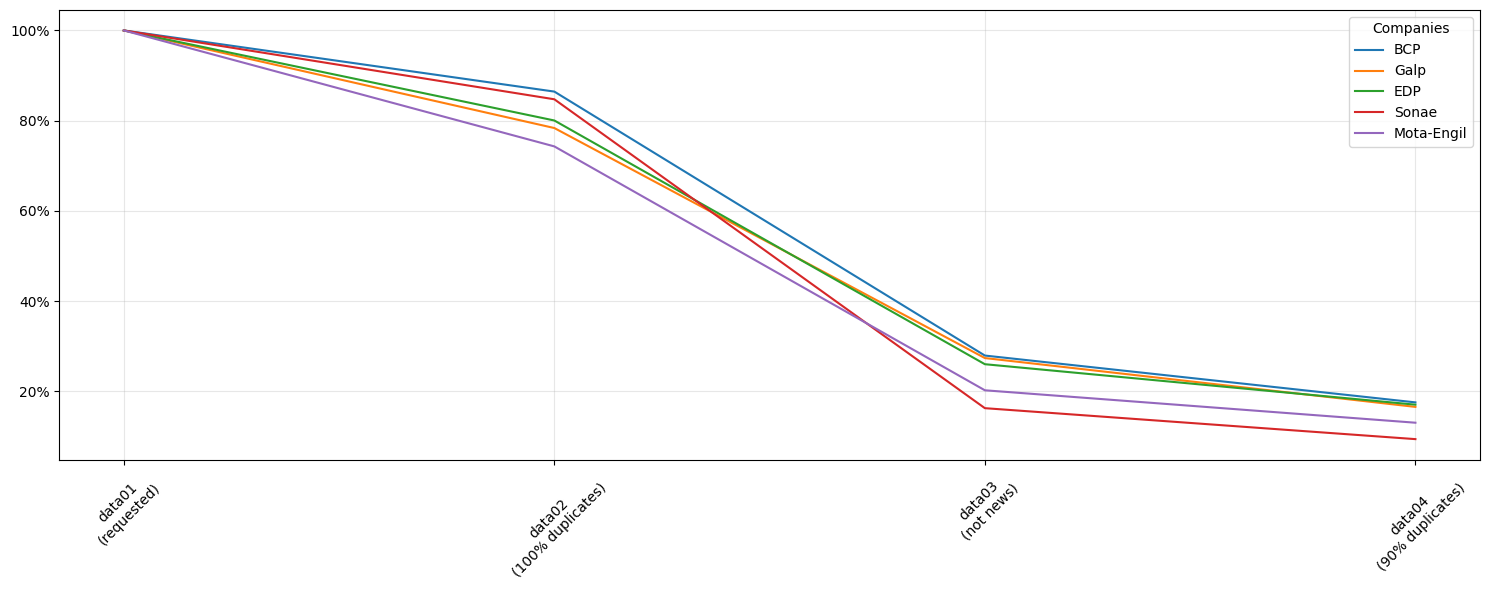

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = df.iloc[:, 4:]

# Derreter o DataFrame para que tenhamos uma coluna de "Categoria" e outra de "Valor"
df_melted = df.melt(id_vars="tag", var_name="data", value_name="Valor")

df_melted = df.melt(id_vars="tag", var_name="data", value_name="Valor")

# Criar o gráfico
plt.figure(figsize=(15, 6))

# Plotar uma linha para cada observação
for obs in df["tag"].unique():
    df_obs = df_melted[df_melted["tag"] == obs]
    plt.plot(df_obs["data"], df_obs["Valor"], label=obs)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))

plt.xticks(rotation=45)  # ha='center' alinha os rótulos horizontalmente no centro

# Aplicar o layout automático para ajustar o espaçamento
plt.tight_layout()
# Customizações do gráfico
plt.legend(title="Companies")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()


In [6]:
df_melted

,tag,data,Valor
0,BCP,data01\n(requested),100.000000
1,Galp,data01\n(requested),100.000000
2,EDP,data01\n(requested),100.000000
3,Sonae,data01\n(requested),100.000000
4,Mota-Engil,data01\n(requested),100.000000
5,BCP,data02\n(100% duplicates),86.444735
6,Galp,data02\n(100% duplicates),78.366762
7,EDP,data02\n(100% duplicates),80.039314
8,Sonae,data02\n(100% duplicates),84.739319
9,Mota-Engil,data02\n(100% duplicates),74.294533
